# Decision Tree to regression depression scale

## 1. import library

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics

import pandas as pd

## 2. load dataset

In [2]:
data = pd.read_csv("../preprocessing/preprocessing_hn18.csv")
data = data.drop(labels='Unnamed: 0',axis=1)
data.head()

,ID,sex,age,HE_sbp,HE_dbp,HE_ht,HE_wt,HE_BMI,depression_scale,body_fat,r_average,l_average
0,A701020501,1,80,150.0,84.0,162.4,56.0,21.2,0,27.7,20.5,18.1
1,A701021301,1,78,132.0,77.0,167.7,76.4,27.2,0,34.3,39.6,37.4
2,A701021302,2,75,156.0,73.0,157.7,53.2,21.4,0,37.5,16.0,10.5
3,A701022601,2,43,102.0,70.0,151.0,53.5,23.5,0,32.6,24.4,20.6
4,A701023303,2,80,149.0,81.0,146.1,57.6,27.0,0,45.4,12.7,14.3


### Target attribute 분리

In [3]:
# attribute
x = data.drop(labels='ID',axis=1)
x = x.drop(labels='depression_scale',axis=1)
print(x.columns)

x_np = x.to_numpy()
x_np

Index(['sex', 'age', 'HE_sbp', 'HE_dbp', 'HE_ht', 'HE_wt', 'HE_BMI',
       'body_fat', 'r_average', 'l_average'],
      dtype='object')


array([[  1. ,  80. , 150. , ...,  27.7,  20.5,  18.1],
       [  1. ,  78. , 132. , ...,  34.3,  39.6,  37.4],
       [  2. ,  75. , 156. , ...,  37.5,  16. ,  10.5],
       ...,
       [  2. ,  66. ,  98. , ...,  40.9,  20.1,  18.6],
       [  2. ,  73. , 136. , ...,  40.9,  23.2,  21.4],
       [  1. ,  43. , 122. , ...,  26. ,  31.9,  32.4]])

In [4]:
# target attribute
y = data['depression_scale']
y_np = y.to_numpy()

def make_class(d):
    if d == 0:
        return 'a'
    if d == 1:
        return 'b'
    if d == 2:
        return 'c'
    if d == 3:
        return 'd'

y_np = [make_class(i) for i in y_np]
print(y_np)

['a', 'a', 'a', 'a', 'a', 'a', 'c', 'a', 'b', 'a', 'a', 'a', 'a', 'b', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'b', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'a', 'a', 'a', 'a', 'a', 'b', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'c', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'a', 'a', 'a', 'a', 'a', 'c', 'b', 'a', 'a', 'a', 'c', 'b', 'a', 'a', 'c', 'a', 'c', 'a', 'b', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'c', 'a', 'b', 'a', 'a', 'a', 'b', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',

### Training set, test set을 7:3 비율로 분리 (랜덤하게)

In [5]:
# train, test 분리
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(x_np, y_np, test_size=0.3, random_state=777, stratify=y)

In [6]:
print(df_y_train)

['c', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'a', 'a', 'b', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'a', 'a', 'b', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'c', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'a', 'a', 'a', 'a', 'c', 'b', 'a', 'a', 'a', 'a', 'b', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'c', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'a', 'b', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'c', 'a', 'c', 'a', 'b', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'd', 'c', 'b', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'a', 'b', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'c', 'a', 'a', 'a', 'b', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'b', 'a', 'a', 'a', 'c', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'a', 'a', 'a', 'a', 'b', 'a', 'b', 'a', 'a', 'a', 'a',

## 3. Decision tree 모형 생성

[Text(607.0953066589823, 801.81, 'r_average <= 28.15\ngini = 0.298\nsamples = 3913\nvalue = [3238, 494, 162, 19]\nclass = a'),
 Text(152.25819229061747, 774.63, 'age <= 32.5\ngini = 0.353\nsamples = 2350\nvalue = [1852, 353, 128, 17]\nclass = a'),
 Text(25.46762170252817, 747.4499999999999, 'HE_ht <= 151.85\ngini = 0.487\nsamples = 338\nvalue = [228, 74, 33, 3]\nclass = a'),
 Text(3.7346858741405002, 720.27, 'HE_BMI <= 21.9\ngini = 0.42\nsamples = 10\nvalue = [3, 7, 0, 0]\nclass = b'),
 Text(1.8673429370702501, 693.0899999999999, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0, 0]\nclass = b'),
 Text(5.602028811210751, 693.0899999999999, 'HE_sbp <= 96.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1, 0, 0]\nclass = a'),
 Text(3.7346858741405002, 665.91, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]\nclass = b'),
 Text(7.4693717482810005, 665.91, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0]\nclass = a'),
 Text(47.20055753091584, 720.27, 'HE_ht <= 158.25\ngini = 0.478\nsamples = 328\nvalue = [2

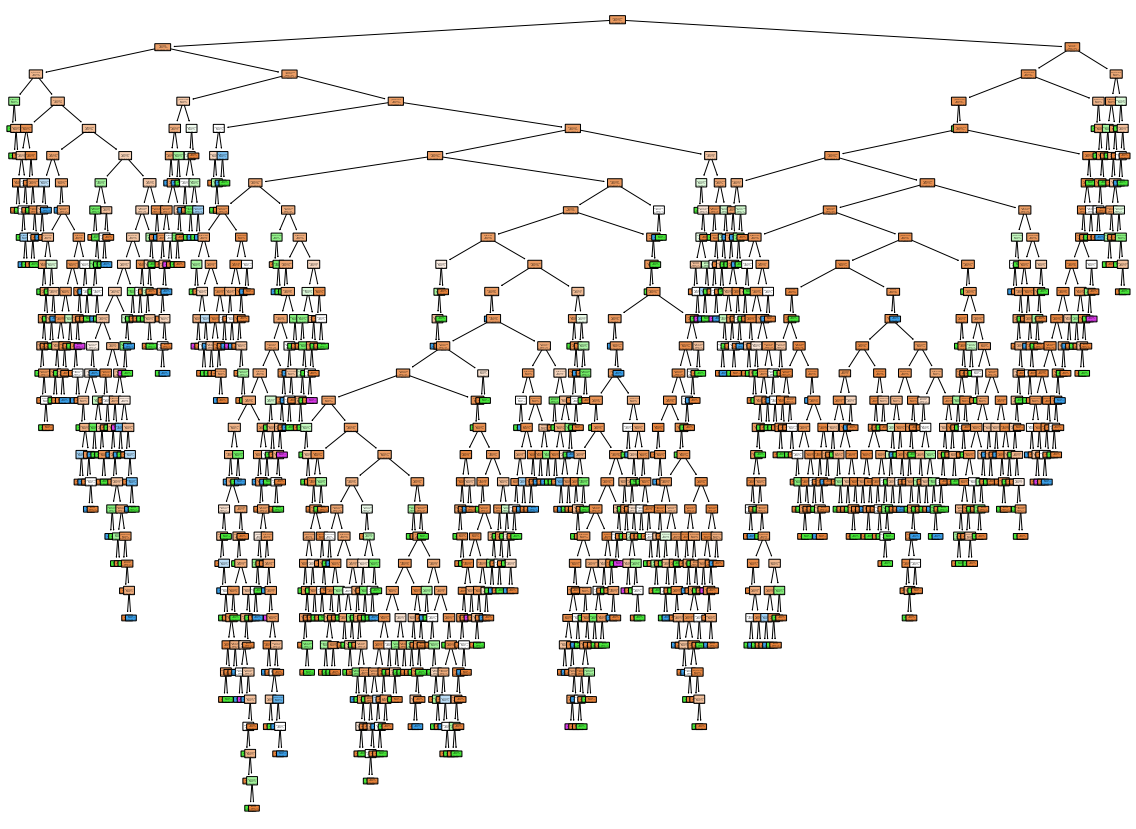

In [7]:
# decision tree 모형 인스턴스 생성
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(df_x_train,df_y_train)

plt.figure( figsize=(20,15) )
tree.plot_tree(tree_model, # 학습한 모형
    feature_names = x.columns, # 사용한 변수 이름
    class_names = ['a', 'b', 'c', 'd'], # 예측할 타겟 클래스 이름
    impurity=True,
    filled=True,
    rounded=True
)

In [8]:
# test
y_pred = tree_model.predict(df_x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(df_y_test, y_pred))

Accuracy: 0.7032181168057211


## 4. Pruning
이전 단계의 DT는 과적합 되었을 가능성이 높기 때문에 max_depth를 바꾸면서 test 정확도가 가장 높은 모델을 찾는다.
그러나 우리의 목표는 4가지의 모든 우울 척도가 leaf node에 하나 이상 포함되길 바라기 때문에,
해당 조건을 만족하는 깊이인 10을 max_depth로 선정한다.

[Text(3240.2834024234694, 3891.681818181818, 'r_average <= 28.15\ngini = 0.298\nsamples = 3913\nvalue = [3238, 494, 162, 19]\nclass = a'),
 Text(1340.5078125, 3521.0454545454545, 'age <= 32.5\ngini = 0.353\nsamples = 2350\nvalue = [1852, 353, 128, 17]\nclass = a'),
 Text(318.0564413265306, 3150.409090909091, 'HE_ht <= 151.85\ngini = 0.487\nsamples = 338\nvalue = [228, 74, 33, 3]\nclass = a'),
 Text(56.93877551020408, 2779.772727272727, 'HE_BMI <= 21.9\ngini = 0.42\nsamples = 10\nvalue = [3, 7, 0, 0]\nclass = b'),
 Text(28.46938775510204, 2409.136363636364, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0, 0]\nclass = b'),
 Text(85.40816326530611, 2409.136363636364, 'HE_wt <= 68.9\ngini = 0.375\nsamples = 4\nvalue = [3, 1, 0, 0]\nclass = a'),
 Text(56.93877551020408, 2038.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0]\nclass = a'),
 Text(113.87755102040816, 2038.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]\nclass = b'),
 Text(579.1741071428571, 2779.772727272727, 'HE_ht <= 158.25\ngin

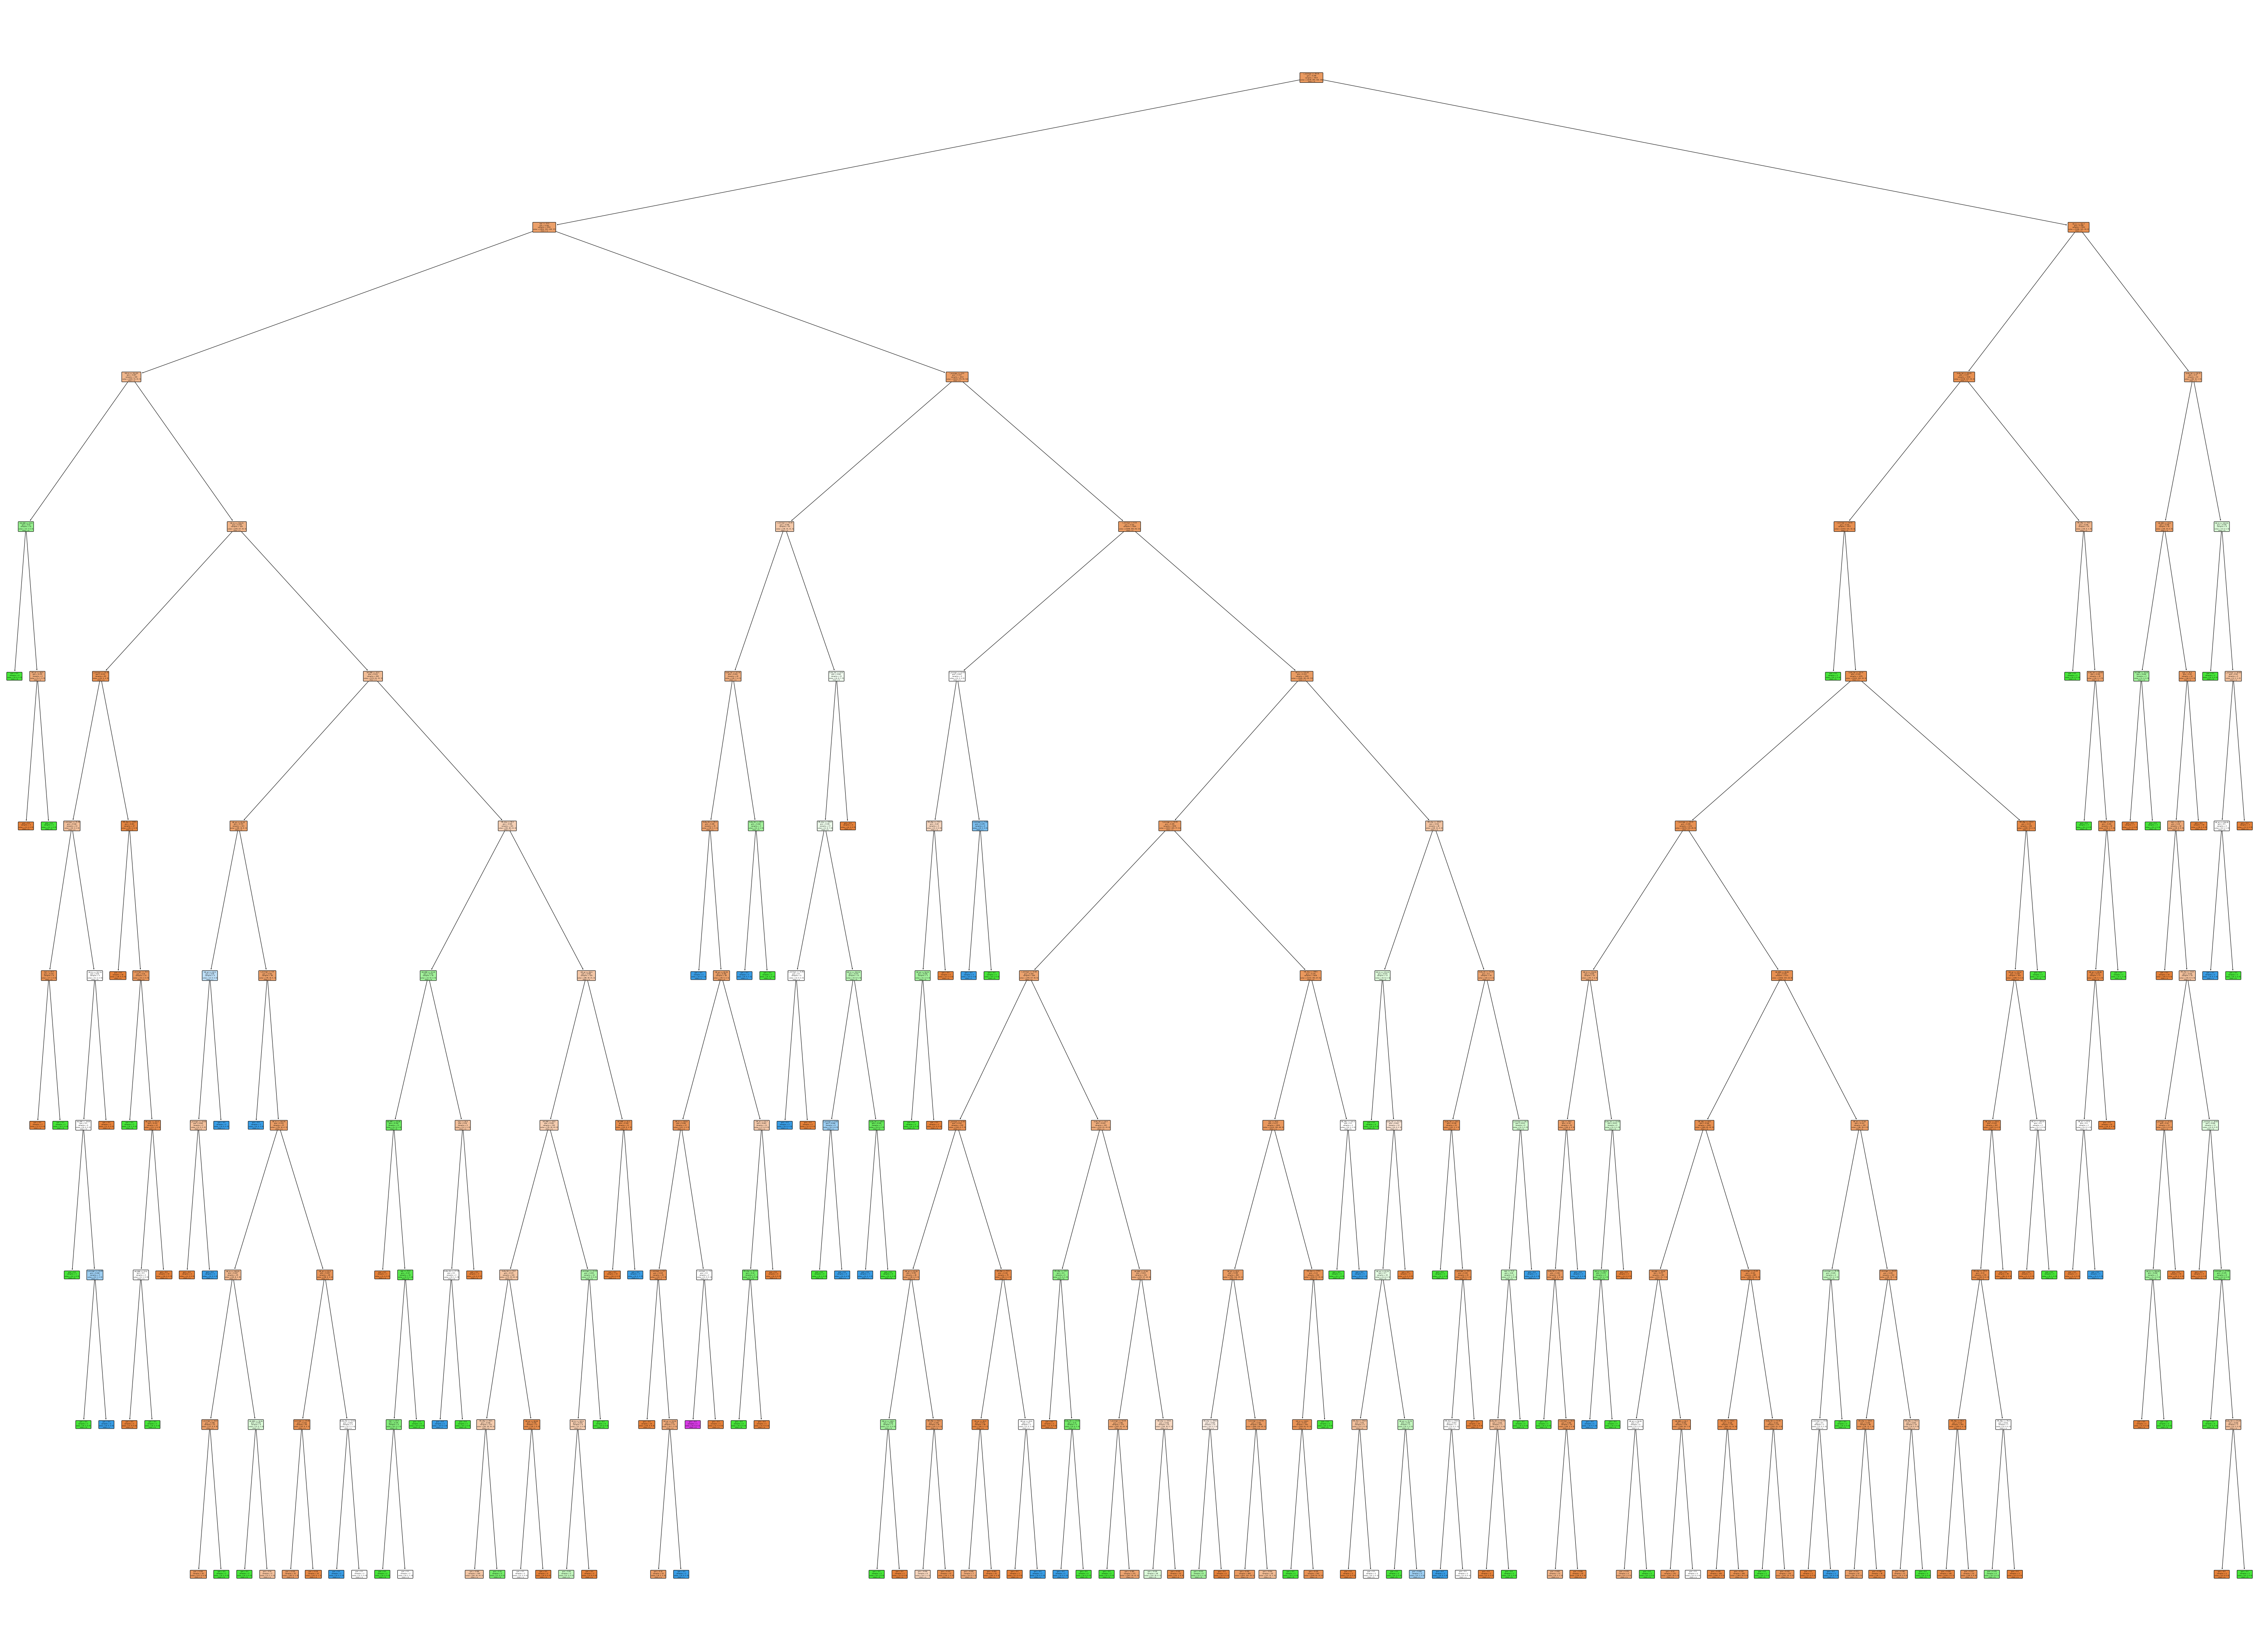

In [9]:
# 과적합 되었으므로, pruning 및 하이퍼파라미터(depth)
tree_model_prun = DecisionTreeClassifier(max_depth=10)
tree_model_prun.fit(df_x_train,df_y_train)

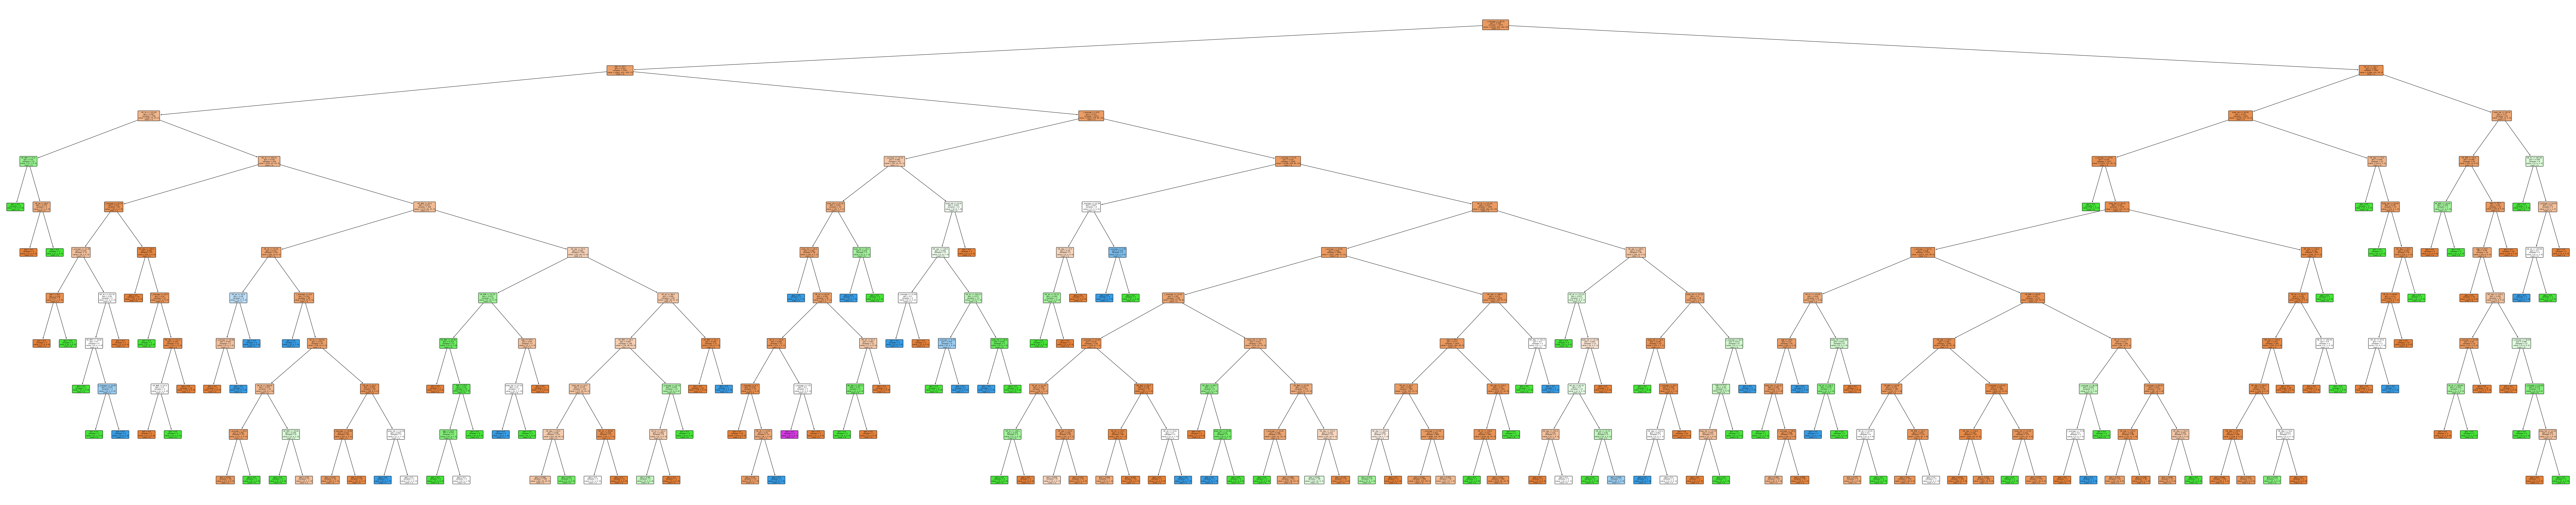

In [34]:
from sklearn.tree import export_graphviz

fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize=(150,30))
tree.plot_tree(tree_model_prun, # 학습한 모형
    feature_names = x.columns, # 사용한 변수 이름
    class_names = ['a', 'b', 'c', 'd'], # 예측할 타겟 클래스 이름
    impurity=True,
    filled=True,
    rounded=True,
)
fig.savefig('output_prun.png')

In [29]:
export_graphviz(tree_model_prun, out_file='depression_tree_model.dot',
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names = x.columns, # 사용한 변수 이름
    class_names = ['a', 'b', 'c', 'd'], # 예측할 타겟 클래스 이름
)

In [10]:
# test
y_pred = tree_model_prun.predict(df_x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(df_y_test, y_pred))
y_pred

Accuracy: 0.801549463647199


array(['a', 'a', 'a', ..., 'a', 'a', 'b'], dtype='<U1')

## 5. Apply

운동 데이터셋에 적용하여 우울 척도 예측하기

In [41]:
exercises_data = pd.read_csv('../rowdata/main_exercises.csv')
exercises_data = exercises_data.drop(labels='Unnamed: 0',axis=1)
exercises_data.head()

,CNTER_NM,AGE_NAME,AGE,GRADE,GENDER,HEIGHT,WEIGHT,BODY_FAT_PER,MIN_BLOOD_PRESSURE,MAX_BLOOD_PRESSURE,L_GRIP,R_GRIP,FLEXIBILITY,BMI,RELATIVE_GRIP,PROGRAM,exercises
0,광명,성인,63.0,3등급,F,162.0,63.08,37.2,40.0,97.0,21.9,21.0,20.8,24.0,34.7,"본운동:옆구리 스트레칭,전신 루틴 스트레칭,좌식생활자를 위한 동적 루틴 스트레칭 ,...","['옆구리스트레칭', '전신루틴스트레칭', '좌식생활자를위한동적루틴스트레칭', '계..."
1,남구(부산),성인,49.0,참가증,F,162.9,55.02,22.8,86.0,124.0,23.9,25.9,19.3,20.7,47.0,"본운동:목 스트레칭,배스트레칭,상지 루틴 스트레칭,엉덩이 스트레칭,옆구리 스트레칭,...","['목스트레칭', '배스트레칭', '상지루틴스트레칭', '엉덩이스트레칭', '옆구리..."
2,광명,성인,62.0,참가증,F,156.3,43.22,16.6,80.0,120.0,16.6,22.3,9.2,17.7,51.5,"본운동:넙다리 뒤쪽 스트레칭,넙다리 앞쪽 스트레칭,등/어깨 뒤쪽 스트레칭,상지 루틴...","['넙다리뒤쪽스트레칭', '넙다리앞쪽스트레칭', '등']"
3,남구(부산),성인,43.0,3등급,F,151.1,51.42,34.1,65.0,107.0,22.3,21.5,20.7,22.5,43.3,"본운동:상지 루틴 스트레칭,유산소 운동 전 동적 루틴 스트레칭,전신 루틴 스트레칭,...","['상지루틴스트레칭', '유산소운동전동적루틴스트레칭', '전신루틴스트레칭', '하지..."
4,광명,성인,60.0,참가증,F,162.1,94.88,47.2,75.0,116.0,20.7,22.8,15.7,36.1,24.0,"본운동:가슴/어깨 앞쪽 스트레칭,등/어깨 뒤쪽 스트레칭,배스트레칭,엉덩이 스트레칭,...",['가슴']


### 성별 M,F를 1,2로 변환

In [42]:
def change_index_sex(row):
    if row['GENDER'] == 'F':
        return 2
    elif row['GENDER'] == 'M':
        return 1

exercises_data['sex'] = exercises_data.apply(change_index_sex, axis=1)
exercises_data = exercises_data.drop(labels='GENDER',axis=1)
exercises_data.head()

,CNTER_NM,AGE_NAME,AGE,GRADE,HEIGHT,WEIGHT,BODY_FAT_PER,MIN_BLOOD_PRESSURE,MAX_BLOOD_PRESSURE,L_GRIP,R_GRIP,FLEXIBILITY,BMI,RELATIVE_GRIP,PROGRAM,exercises,sex
0,광명,성인,63.0,3등급,162.0,63.08,37.2,40.0,97.0,21.9,21.0,20.8,24.0,34.7,"본운동:옆구리 스트레칭,전신 루틴 스트레칭,좌식생활자를 위한 동적 루틴 스트레칭 ,...","['옆구리스트레칭', '전신루틴스트레칭', '좌식생활자를위한동적루틴스트레칭', '계...",2
1,남구(부산),성인,49.0,참가증,162.9,55.02,22.8,86.0,124.0,23.9,25.9,19.3,20.7,47.0,"본운동:목 스트레칭,배스트레칭,상지 루틴 스트레칭,엉덩이 스트레칭,옆구리 스트레칭,...","['목스트레칭', '배스트레칭', '상지루틴스트레칭', '엉덩이스트레칭', '옆구리...",2
2,광명,성인,62.0,참가증,156.3,43.22,16.6,80.0,120.0,16.6,22.3,9.2,17.7,51.5,"본운동:넙다리 뒤쪽 스트레칭,넙다리 앞쪽 스트레칭,등/어깨 뒤쪽 스트레칭,상지 루틴...","['넙다리뒤쪽스트레칭', '넙다리앞쪽스트레칭', '등']",2
3,남구(부산),성인,43.0,3등급,151.1,51.42,34.1,65.0,107.0,22.3,21.5,20.7,22.5,43.3,"본운동:상지 루틴 스트레칭,유산소 운동 전 동적 루틴 스트레칭,전신 루틴 스트레칭,...","['상지루틴스트레칭', '유산소운동전동적루틴스트레칭', '전신루틴스트레칭', '하지...",2
4,광명,성인,60.0,참가증,162.1,94.88,47.2,75.0,116.0,20.7,22.8,15.7,36.1,24.0,"본운동:가슴/어깨 앞쪽 스트레칭,등/어깨 뒤쪽 스트레칭,배스트레칭,엉덩이 스트레칭,...",['가슴'],2


### Age 80세 이상은 80세로 처리

In [43]:
def change_age(row):
    if row["AGE"] >= 80:
        return 80
    else:
        return row["AGE"]

exercises_data['age'] = exercises_data.apply(change_age, axis=1)
exercises_data = exercises_data.drop(labels='AGE',axis=1)
exercises_data.head()

,CNTER_NM,AGE_NAME,GRADE,HEIGHT,WEIGHT,BODY_FAT_PER,MIN_BLOOD_PRESSURE,MAX_BLOOD_PRESSURE,L_GRIP,R_GRIP,FLEXIBILITY,BMI,RELATIVE_GRIP,PROGRAM,exercises,sex,age
0,광명,성인,3등급,162.0,63.08,37.2,40.0,97.0,21.9,21.0,20.8,24.0,34.7,"본운동:옆구리 스트레칭,전신 루틴 스트레칭,좌식생활자를 위한 동적 루틴 스트레칭 ,...","['옆구리스트레칭', '전신루틴스트레칭', '좌식생활자를위한동적루틴스트레칭', '계...",2,63.0
1,남구(부산),성인,참가증,162.9,55.02,22.8,86.0,124.0,23.9,25.9,19.3,20.7,47.0,"본운동:목 스트레칭,배스트레칭,상지 루틴 스트레칭,엉덩이 스트레칭,옆구리 스트레칭,...","['목스트레칭', '배스트레칭', '상지루틴스트레칭', '엉덩이스트레칭', '옆구리...",2,49.0
2,광명,성인,참가증,156.3,43.22,16.6,80.0,120.0,16.6,22.3,9.2,17.7,51.5,"본운동:넙다리 뒤쪽 스트레칭,넙다리 앞쪽 스트레칭,등/어깨 뒤쪽 스트레칭,상지 루틴...","['넙다리뒤쪽스트레칭', '넙다리앞쪽스트레칭', '등']",2,62.0
3,남구(부산),성인,3등급,151.1,51.42,34.1,65.0,107.0,22.3,21.5,20.7,22.5,43.3,"본운동:상지 루틴 스트레칭,유산소 운동 전 동적 루틴 스트레칭,전신 루틴 스트레칭,...","['상지루틴스트레칭', '유산소운동전동적루틴스트레칭', '전신루틴스트레칭', '하지...",2,43.0
4,광명,성인,참가증,162.1,94.88,47.2,75.0,116.0,20.7,22.8,15.7,36.1,24.0,"본운동:가슴/어깨 앞쪽 스트레칭,등/어깨 뒤쪽 스트레칭,배스트레칭,엉덩이 스트레칭,...",['가슴'],2,60.0


### 열 이름 변환
모델에 학습된 열 이름대로 변환. 반드시 필요한 과정은 아니지만, 헷갈리지 않기 위해서.

In [44]:
exercises_data = exercises_data.rename(columns={'HEIGHT':'HE_ht'})
exercises_data = exercises_data.rename(columns={'WEIGHT':'HE_wt'})
exercises_data = exercises_data.rename(columns={'BODY_FAT_PER':'body_fat'})
exercises_data = exercises_data.rename(columns={'BMI':'HE_BMI'})
exercises_data = exercises_data.rename(columns={'MIN_BLOOD_PRESSURE':'HE_dbp'})
exercises_data = exercises_data.rename(columns={'MAX_BLOOD_PRESSURE':'HE_sbp'})
exercises_data = exercises_data.rename(columns={'L_GRIP':'l_average'})
exercises_data = exercises_data.rename(columns={'R_GRIP':'r_average'})

exercises_data.head()

,CNTER_NM,AGE_NAME,GRADE,HE_ht,HE_wt,body_fat,HE_dbp,HE_sbp,l_average,r_average,FLEXIBILITY,HE_BMI,RELATIVE_GRIP,PROGRAM,exercises,sex,age
0,광명,성인,3등급,162.0,63.08,37.2,40.0,97.0,21.9,21.0,20.8,24.0,34.7,"본운동:옆구리 스트레칭,전신 루틴 스트레칭,좌식생활자를 위한 동적 루틴 스트레칭 ,...","['옆구리스트레칭', '전신루틴스트레칭', '좌식생활자를위한동적루틴스트레칭', '계...",2,63.0
1,남구(부산),성인,참가증,162.9,55.02,22.8,86.0,124.0,23.9,25.9,19.3,20.7,47.0,"본운동:목 스트레칭,배스트레칭,상지 루틴 스트레칭,엉덩이 스트레칭,옆구리 스트레칭,...","['목스트레칭', '배스트레칭', '상지루틴스트레칭', '엉덩이스트레칭', '옆구리...",2,49.0
2,광명,성인,참가증,156.3,43.22,16.6,80.0,120.0,16.6,22.3,9.2,17.7,51.5,"본운동:넙다리 뒤쪽 스트레칭,넙다리 앞쪽 스트레칭,등/어깨 뒤쪽 스트레칭,상지 루틴...","['넙다리뒤쪽스트레칭', '넙다리앞쪽스트레칭', '등']",2,62.0
3,남구(부산),성인,3등급,151.1,51.42,34.1,65.0,107.0,22.3,21.5,20.7,22.5,43.3,"본운동:상지 루틴 스트레칭,유산소 운동 전 동적 루틴 스트레칭,전신 루틴 스트레칭,...","['상지루틴스트레칭', '유산소운동전동적루틴스트레칭', '전신루틴스트레칭', '하지...",2,43.0
4,광명,성인,참가증,162.1,94.88,47.2,75.0,116.0,20.7,22.8,15.7,36.1,24.0,"본운동:가슴/어깨 앞쪽 스트레칭,등/어깨 뒤쪽 스트레칭,배스트레칭,엉덩이 스트레칭,...",['가슴'],2,60.0


### prediction

In [45]:
x.columns

Index(['sex', 'age', 'HE_sbp', 'HE_dbp', 'HE_ht', 'HE_wt', 'HE_BMI',
       'body_fat', 'r_average', 'l_average'],
      dtype='object')

In [46]:
def prediction_depression_scale(row):
    row_list = [
        row['sex'], row['age'], row['HE_sbp'], row['HE_dbp'],
        row['HE_ht'], row['HE_wt'], row['HE_BMI'],
        row['body_fat'], row['r_average'], row['l_average']
    ]
    result = tree_model_prun.predict([row_list])
    return result[0]

exercises_data['depression_scale'] = exercises_data.apply(prediction_depression_scale, axis=1)

exercises_data.head()

,CNTER_NM,AGE_NAME,GRADE,HE_ht,HE_wt,body_fat,HE_dbp,HE_sbp,l_average,r_average,FLEXIBILITY,HE_BMI,RELATIVE_GRIP,PROGRAM,exercises,sex,age,depression_scale
0,광명,성인,3등급,162.0,63.08,37.2,40.0,97.0,21.9,21.0,20.8,24.0,34.7,"본운동:옆구리 스트레칭,전신 루틴 스트레칭,좌식생활자를 위한 동적 루틴 스트레칭 ,...","['옆구리스트레칭', '전신루틴스트레칭', '좌식생활자를위한동적루틴스트레칭', '계...",2,63.0,a
1,남구(부산),성인,참가증,162.9,55.02,22.8,86.0,124.0,23.9,25.9,19.3,20.7,47.0,"본운동:목 스트레칭,배스트레칭,상지 루틴 스트레칭,엉덩이 스트레칭,옆구리 스트레칭,...","['목스트레칭', '배스트레칭', '상지루틴스트레칭', '엉덩이스트레칭', '옆구리...",2,49.0,a
2,광명,성인,참가증,156.3,43.22,16.6,80.0,120.0,16.6,22.3,9.2,17.7,51.5,"본운동:넙다리 뒤쪽 스트레칭,넙다리 앞쪽 스트레칭,등/어깨 뒤쪽 스트레칭,상지 루틴...","['넙다리뒤쪽스트레칭', '넙다리앞쪽스트레칭', '등']",2,62.0,c
3,남구(부산),성인,3등급,151.1,51.42,34.1,65.0,107.0,22.3,21.5,20.7,22.5,43.3,"본운동:상지 루틴 스트레칭,유산소 운동 전 동적 루틴 스트레칭,전신 루틴 스트레칭,...","['상지루틴스트레칭', '유산소운동전동적루틴스트레칭', '전신루틴스트레칭', '하지...",2,43.0,a
4,광명,성인,참가증,162.1,94.88,47.2,75.0,116.0,20.7,22.8,15.7,36.1,24.0,"본운동:가슴/어깨 앞쪽 스트레칭,등/어깨 뒤쪽 스트레칭,배스트레칭,엉덩이 스트레칭,...",['가슴'],2,60.0,a


### SAVE prediction result

In [47]:
exercises_data.to_csv('exercise_with_depression.csv')